<a href="https://colab.research.google.com/github/riccardomarin/prog_algo_2022/blob/main/04_Chips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proviamo a simulare il problema dei chip

In [6]:
import random 

# CHIPS test: prende due chip e li testa a vicenda
def pair_test(one,two):
  # Se abbiamo passato "None" qualcosa non va!
  assert one != None
  assert two != None 

  # Avremmo un esito per il primo e per il secondo chip
  answer = [None, None]

  # Se il chip è Good, allora mi darà l'esito esatto
  # del secondo. Altrimenti, ritorna un valore a caso
  if one == 'G':
    answer[1] = two
  else:
    answer[1] = random.choice(['G','B'])
  
  if two == 'G':
    answer[0] = one
  else:
    answer[0] = random.choice(['G','B'])
    
  return answer 

In [7]:
import numpy as np 
from random import shuffle 
import progressbar 
import time 

# Procedura per individuare un chip buono:
# Input: una lista di chip, e "indici" è solo per tenere traccia
#        durante le chiamate dei chip residui
def test_procedure(L, indici):
  G = L.copy()
  escluso = None
  escluso_idx = None

  # Se gli elementi sono dispari, metti da parte l'ultimo elemento
  if not((len(L) % 2) == 0):
    escluso = G[-1]
    G = G[:-1]
    escluso_idx = indici[-1]
    indici = indici[:-1]

  # esegui N\2 confronti
  for i in np.arange(0, len(L)//2):
      risultato = pair_test(G[i], G[i + len(L)//2])

  # Se entrambi danno segnale positivo, scarta solo uno
      if risultato == ['G','G']:
        G[i] = None 
        indici[i] = None
      else:
  # Altrimenti, scartali entrambi
        G[i] = None
        G[i + len(L)//2] = None
        indici[i] = None
        indici[i + len(L)//2] = None

  # Se avevamo rimosso un elemento, riportiamolo nella lista
  if not(escluso == None):
    G.append(escluso)
    indici.append(escluso_idx)
  
  # Puliamo i vettori dagli scarti
  G = list(filter(None,G))
  indici_2 = list(filter(None,indici))
  
  # Ferma la procedura quando rimangono 3 o meno chip
  if len(G) <= 3:
    return G, indici_2
  else:
    return test_procedure(G, indici_2)


In [30]:
n_istanze = 200

# Misuriamo i tempi su un po' di istanze
durations = []
for i in progressbar.progressbar(np.arange(4,1000)):
  d = 0
  for k in np.arange(0,n_istanze):
    # Per generare l'istanza devo avere più Good che Bad. Quindi
    # avrò al più brokens=(i//2) rotti, e poi (i - brokens + 1) 
    brokens = np.random.choice(np.arange(i//2 - i//4,i//2))
    L = ['B'] * brokens + ['G'] * (i - brokens + 1)

    # Li permuto random
    shuffle(L)
    indici = list(np.arange(len(L)))

    # == INIZIO TIMING ==
    s = time.time() 

    G, indici = test_procedure(L, indici)

    # Se restano 1 o 2 chip, allora sono Good, e ne prendo uno a caso
    if len(G) <= 2:
      ans = indici[0]
    else:
    # Altrimenti, testo due chip: se ritorna entrambi Good, allora sono davvero
    # buoni e ne prendo uno. Altrimenti, prendo quello che è rimasto fuori
      result = pair_test(G[0],G[1])
      if result == ['G','G']:
        ans = indici[0]
      else:
        ans = indici[2]
    # == FINE TIMING ==
    d = d + time.time() - s

    # Check di correttezza
    assert L[ans] == 'G'

  # Calcolo la media del tempo
  durations.append(d/n_istanze)

100% (996 of 996) |######################| Elapsed Time: 0:04:31 Time:  0:04:31


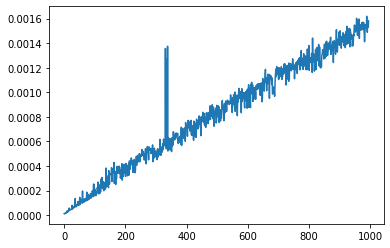

In [31]:
import matplotlib.pyplot as plt

plt.plot(durations)